# 思路一：从总体中中抽取5000个样本，进行回归，重复操作500次

## **导入模块**

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## **读取文件**

In [5]:
data = pd.read_csv(r"C:\Users\giao\Desktop\作业\抽样技术\diamonds.csv")

## **查看数据**

In [6]:
data.head()

,price,carat,cut,color,clarity,x,y,z
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,4.34,4.35,2.75


## **描述数据**

In [7]:
data.describe()

,price,carat,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,0.797940,5.731157,5.734526,3.538734
std,3989.439738,0.474011,1.121761,1.142135,0.705699
min,326.000000,0.200000,0.000000,0.000000,0.000000
25%,950.000000,0.400000,4.710000,4.720000,2.910000
50%,2401.000000,0.700000,5.700000,5.710000,3.530000
75%,5324.250000,1.040000,6.540000,6.540000,4.040000
max,18823.000000,5.010000,10.740000,58.900000,31.800000


## **对数据进行不放回抽样**

In [8]:
data0 = data.sample(5000,replace = False)[['carat','price']].values#从‘carat’,'price'两列中抽取5000各样本
data0

array([[8.0000e-01, 5.0070e+03],
       [5.0000e-01, 1.1220e+03],
       [8.2000e-01, 2.6480e+03],
       ...,
       [1.1600e+00, 5.6950e+03],
       [3.1000e-01, 4.3500e+02],
       [1.0700e+00, 1.0061e+04]])

### **求β经验期望等值**

In [9]:
betas = []
reg = LinearRegression()
#抽取500次
for i in range(500):
    data2 = data.sample(5000,replace = False)[['carat','price']].values
    x = data2[:,0].reshape(-1,1)
    y = data2[:,1].reshape(-1,1)
    reg.fit(x,y)
    beta = reg.coef_[0]#读取beta数值
    betas.append(beta)#将所有beta添加到betas中
print(betas)

[array([7783.49167739]), array([7806.78435942]), array([7852.38916868]), array([7700.56440729]), array([7864.68044327]), array([7835.26439741]), array([7809.64681166]), array([7553.1811845]), array([7873.71684422]), array([7784.82636728]), array([7839.06143368]), array([7787.9928497]), array([7746.94190794]), array([7799.31869179]), array([7753.73879324]), array([7712.29894587]), array([7579.90455935]), array([7706.56133329]), array([7823.72133247]), array([7949.18113247]), array([7769.59885658]), array([7716.5315984]), array([7790.80498649]), array([7777.85612167]), array([7758.21597284]), array([7840.72849726]), array([7582.3998044]), array([7939.19754109]), array([7821.6862494]), array([7728.27579176]), array([7698.95270919]), array([7693.05202742]), array([7769.09560954]), array([7683.73323841]), array([7649.51279419]), array([7692.93216115]), array([7729.53133879]), array([7717.75070049]), array([7639.92145514]), array([7759.53478882]), array([7754.58825499]), array([7934.18327464

In [10]:
beta = np.array(betas)#调用numpy中的array函数创建数组
beta

array([[7708.08150423],
       [7760.37159387],
       [7737.25268918],
       [7742.45450414],
       [7735.78143561],
       [7612.49253546],
       [7779.94468768],
       [7736.66774286],
       [7778.74590017],
       [7865.83047323],
       [7698.39544987],
       [7845.82819862],
       [7657.37265213],
       [7731.66077757],
       [7734.61485009],
       [7768.97205419],
       [7835.0962369 ],
       [7735.1504598 ],
       [7874.7045525 ],
       [7902.48635947],
       [7769.20735529],
       [7530.19885687],
       [7628.66621125],
       [7780.61195398],
       [7834.1700551 ],
       [7827.91453073],
       [7709.79198743],
       [7750.81205502],
       [7836.74433001],
       [7790.48394199],
       [7720.60380498],
       [7722.63416108],
       [7699.87354611],
       [7636.43079004],
       [7722.57295832],
       [7747.95855364],
       [7626.57680398],
       [7752.08456276],
       [7704.88148743],
       [7764.66729927],
       [7832.95280581],
       [7822.926

In [11]:
beta = np.sort(beta)#对beta进行排序
beta

array([[7708.08150423],
       [7760.37159387],
       [7737.25268918],
       [7742.45450414],
       [7735.78143561],
       [7612.49253546],
       [7779.94468768],
       [7736.66774286],
       [7778.74590017],
       [7865.83047323],
       [7698.39544987],
       [7845.82819862],
       [7657.37265213],
       [7731.66077757],
       [7734.61485009],
       [7768.97205419],
       [7835.0962369 ],
       [7735.1504598 ],
       [7874.7045525 ],
       [7902.48635947],
       [7769.20735529],
       [7530.19885687],
       [7628.66621125],
       [7780.61195398],
       [7834.1700551 ],
       [7827.91453073],
       [7709.79198743],
       [7750.81205502],
       [7836.74433001],
       [7790.48394199],
       [7720.60380498],
       [7722.63416108],
       [7699.87354611],
       [7636.43079004],
       [7722.57295832],
       [7747.95855364],
       [7626.57680398],
       [7752.08456276],
       [7704.88148743],
       [7764.66729927],
       [7832.95280581],
       [7822.926

In [12]:
mean = np.mean(beta)#求得500次抽取结果中beta的期望
mean

7757.424161256963

In [13]:
var = np.var(beta)#求得方差
var

6155.417647197718

In [14]:
s = np.std(beta, ddof=1)#求无偏样本标准差
xbar = np.mean(beta)

# **数据可视化**

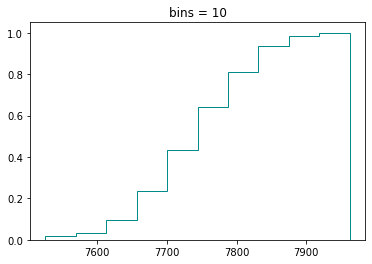

In [15]:
#数据可视化 画数据经验分布曲线图（bins：直方图的条形数目）
nt, bins, patches = plt.hist(beta, bins=10, histtype='step', \
cumulative=True, density=True, color='darkcyan')                    
plt.title('bins = 10')
plt.savefig('经验函数分布图1.jpg', dpi=200)
plt.show()

Text(0.5, 1.0, 'bins = 15')

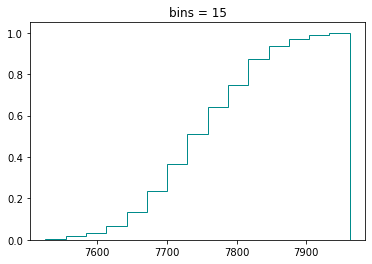

In [16]:
#数据可视化 画数据经验分布曲线图
nt, bins, patches = plt.hist(beta, bins=15, histtype='step', \
cumulative=True, density=True, color='darkcyan')#beta是数据,bins是分组数
plt.title('bins = 15')

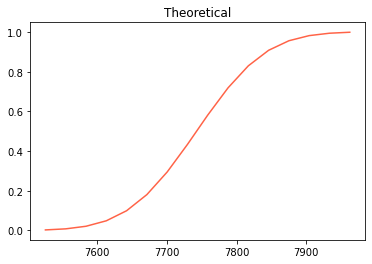

In [17]:
#正态分布函数曲线拟合（np.sqrt():表示括号中数字的平方根，np.pi：表示圆周率Π，np.exp：表示求e的x次方的函数）
y = (1 / (np.sqrt(2 * np.pi) * s)) * np.exp(-0.5 * ((bins - xbar) ** 2 / s ** 2))
y = y.cumsum()#计算轴向元素累加和
y = y / y[-1]
plt.plot(bins, y, 'tomato', linewidth = 1.5)
plt.title('Theoretical')
plt.savefig('经验函数分布图2.jpg', dpi=200)#保存图片
plt.show()